# Objective

<span style="color: black; font-family: Arial; font-size: 20px;">
The objective is to investigate which plan generates the most revenue for the company, with the goal of adjusting marketing budgets.

## Loading data:

In [71]:
# Loading libraries
from scipy import stats as st
import numpy as np
import pandas as pd
from math import factorial
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Loading dataframes
df_calls = pd.read_csv(r"C:\Users\pedro\Desktop\megaline_calls.csv")
df_internet = pd.read_csv(r"C:\Users\pedro\Desktop\megaline_internet.csv")
df_messages = pd.read_csv(r"C:\Users\pedro\Desktop\megaline_messages.csv")
df_plans = pd.read_csv(r"C:\Users\pedro\Desktop\megaline_plans.csv")
df_users = pd.read_csv(r"C:\Users\pedro\Desktop\megaline_users.csv")

## Preparing data:

### Plans

In [75]:
# Printing general information about 'df_plans'
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [76]:
# Printing the first 5 lines about 'df_plans'
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [77]:
# Inserting the column 'gb_per_month_included'
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


### Users

In [79]:
# Printing general information about 'df_users'
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [80]:
# Printing the first 5 lines about 'df_users'
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [81]:
# Modifying 'reg_date' column to DATETIME
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Calls

In [83]:
# Printing general information about 'df_calls'
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [84]:
# Printing the first 5 lines about 'df_calls'
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [85]:
# Modifying 'call_date' column to DATETIME
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [232]:
# Rouding call's durations
def rouding (duration):
    arredonda=math.ceil(duration)
    return arredonda
df_calls['duration_rounded'] = df_calls['duration'].apply(rouding)
df_calls.head()

,id,user_id,call_date,duration,duration_rounded,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12


### Mensagens

In [88]:
# Printing general information about 'df_messages'
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [89]:
# Printing the first 5 lines about 'df_messages'
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [90]:
# Modifying 'message_date' column to DATETIME
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Internet

In [92]:
# Printing general information about 'df_internet'
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [93]:
# Printing the first 5 lines about 'df_messages'
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [94]:
# Inserting the column 'gb_used'
df_internet['gb_used'] = df_internet['mb_used'] / 1024
df_internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


In [95]:
# Modifying 'session_date' column to DATETIME
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ MB


## Data Analysis:

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculate the number of calls made by each user per month. Save the result.

In [97]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
monthly_calls = df_calls.groupby(['user_id', 'month'],as_index = False)['id'].count()
monthly_calls.rename({'id':'num_calls'},axis = 1, inplace = True)
monthly_calls.head()

,user_id,month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculate the number of minutes spent by each user per month. Save the result.

In [120]:
monthly_duration = df_calls.groupby(['user_id', 'month'],as_index = False)['duration_rounded'].sum()
monthly_duration.head()

,user_id,month,duration_rounded
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculate the number of messages sent by each user per month. Save the result.

In [125]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
monthly_messages = df_messages.groupby(['user_id', 'month'],as_index = False)['id'].count()
monthly_messages.rename({'id':'messages'},axis = 1, inplace = True)
monthly_messages.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculate the volume of internet traffic used by each user per month. Save the result.

In [129]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
monthly_internet = df_internet.groupby(['user_id', 'month'],as_index = False)['gb_used'].sum()
monthly_internet.head()

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605


<span style="color: blue; font-family: Arial; font-size: 20px;">
Merge calls, minutes, messages, and internet data based on 'user_id' and 'month'.

In [133]:
li = [monthly_duration,monthly_internet,monthly_calls,monthly_messages]
merged_df = li[0]
for df in li [1:]:
    merged_df = pd.merge(merged_df, df, on=['user_id','month'], how='outer')
merged_df

,user_id,month,duration_rounded,gb_used,num_calls,messages
0,1000,12,124.0,1.856904,16.0,11.0
1,1001,8,182.0,6.756982,27.0,30.0
2,1001,9,315.0,13.002754,49.0,44.0
3,1001,10,393.0,21.807119,65.0,53.0
4,1001,11,426.0,18.070605,64.0,36.0
...,...,...,...,...,...,...
2288,1498,12,339.0,22.595400,39.0,NaN
2289,1499,9,346.0,12.680430,41.0,NaN
2290,1499,10,385.0,19.035576,53.0,NaN
2291,1499,11,308.0,16.419756,45.0,NaN


<span style="color: blue; font-family: Arial; font-size: 20px;">
Add information about the plans

In [137]:
df_users_filtered = df_users.drop(columns = ['churn_date'])
monthly_plans = pd.merge(merged_df, df_users_filtered, on='user_id', how='inner')
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf


<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculate the monthly revenue for each user: subtract the free package limit from the total number of calls, texts, and data; multiply the result by the plan value; add the monthly price depending on the plan

In [141]:
# Adding prices information for each plan
surf_monthly_charge = 20
surf_monthly_minutes = 500
surf_monthly_messages = 50
surf_monthly_data = 15
surf_call_charge = 0.03
surf_message_charge = 0.03
surf_data_charge = 10

ultimate_monthly_charge = 70
ultimate_monthly_minutes = 3000
ultimate_monthly_messages = 1000
ultimate_monthly_data = 30
ultimate_call_charge = 0.01
ultimate_message_charge = 0.01
ultimate_data_charge = 7

In [143]:
# Adding costs per call
def charge_calls (row):
    plan=row['plan']
    min_used=row['duration_rounded']
    if plan == 'surf':
        if min_used > 500:
            charge = min_used - 500
        else:
            charge = 0
    if plan == 'ultimate':
        if min_used > 3000:
            charge = min_used - 3000
        else:
            charge = 0
    return charge

In [145]:
monthly_plans['charge_calls'] = monthly_plans.apply(charge_calls, axis=1)
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan,charge_calls
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0.0
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0


In [147]:
# Adding costs per internet
def charge_internet (row):
    plan=row['plan']
    gb_used=row['gb_used']
    if plan == 'surf':
        if gb_used > 15:
            charge = gb_used - 15
        else:
            charge = 0
    if plan == 'ultimate':
        if gb_used > 30:
            charge = gb_used - 30
        else:
            charge = 0
    return charge

In [149]:
monthly_plans['charge_internet'] = monthly_plans.apply(charge_internet, axis=1)
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan,charge_calls,charge_internet
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0.0,0.000000
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,6.807119
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,3.070605


In [151]:
# Adding costs per message
def charge_messages (row):
    plan=row['plan']
    messages_used=row['messages']
    if plan == 'surf':
        if messages_used > 50:
            charge = messages_used - 50
        else:
            charge = 0
    if plan == 'ultimate':
        if messages_used > 1000:
            charge = messages_used - 1000
        else:
            charge = 0
    return charge

In [153]:
monthly_plans['charge_messages'] = monthly_plans.apply(charge_messages, axis=1)
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan,charge_calls,charge_internet,charge_messages
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0.0,0.000000,0.0
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000,0.0
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000,0.0
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,6.807119,3.0
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,3.070605,0.0


In [155]:
# Adding revenue
def monthly_revenue (row):
    plan = row['plan']
    charge_calls = row['charge_calls']
    charge_messages = row['charge_messages']
    charge_internet = row['charge_internet']
    if plan == 'surf':
        revenue = surf_monthly_charge + ((charge_calls * surf_call_charge)+(charge_messages * surf_message_charge)+(charge_internet * surf_data_charge))
    else:
        revenue = ultimate_monthly_charge + ((charge_calls * ultimate_call_charge)+(charge_messages * ultimate_message_charge)+(charge_internet * ultimate_data_charge))
    return revenue

In [157]:
# Adding the revenue per user
monthly_plans['monthly_revenue'] = monthly_plans.apply(monthly_revenue, axis=1)
monthly_plans.head()

,user_id,month,duration_rounded,gb_used,num_calls,messages,first_name,last_name,age,city,reg_date,plan,charge_calls,charge_internet,charge_messages,monthly_revenue
0,1000,12,124.0,1.856904,16.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0.0,0.000000,0.0,70.000000
1,1001,8,182.0,6.756982,27.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000,0.0,20.000000
2,1001,9,315.0,13.002754,49.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,0.000000,0.0,20.000000
3,1001,10,393.0,21.807119,65.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,6.807119,3.0,88.161191
4,1001,11,426.0,18.070605,64.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0.0,3.070605,0.0,50.706055


<span style="color: blue; font-family: Arial; font-size: 20px;">
Compare the mean call duration for each plan for each month.

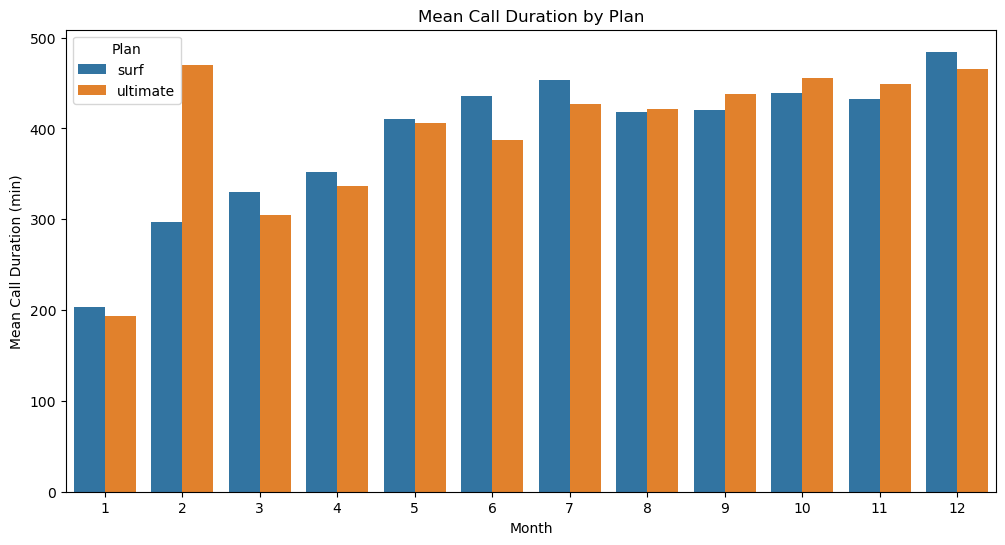

In [247]:
mean_duration = monthly_plans.groupby(['plan', 'month'])['duration_rounded'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='duration_rounded', hue='plan', data=mean_duration)
plt.title('Mean Call Duration by Plan')
plt.xlabel('Month')
plt.ylabel('Mean Call Duration (min)')
plt.legend(title = 'Plan')
plt.show()

<span style="color: blue; font-family: Arial; font-size: 20px;">
Compare the number of minutes that users on each plan need each month.

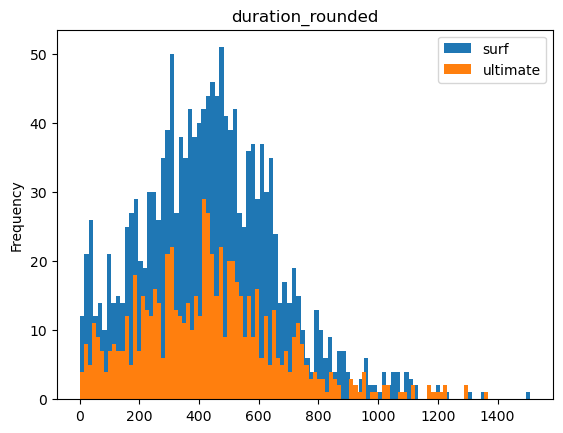

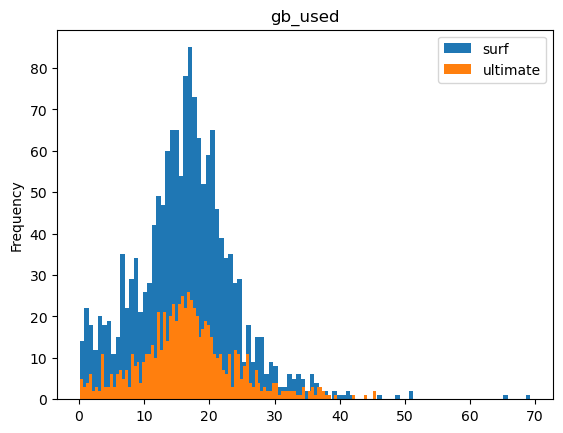

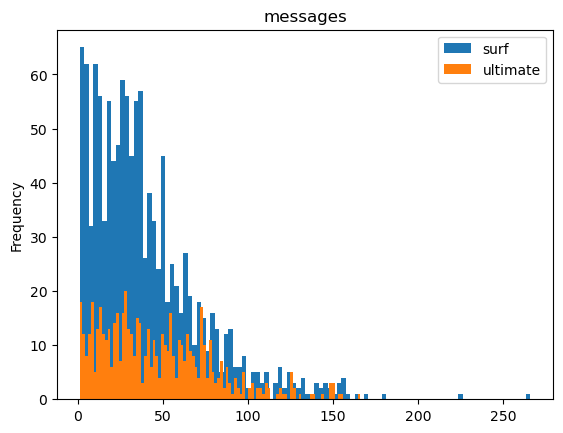

In [166]:
variables = ['duration_rounded', 'gb_used', 'messages']
plans = ['surf', 'ultimate']
for column in variables:
    for tariff in plans:
        monthly_plans[monthly_plans['plan'] == tariff][column].plot(kind='hist', bins=100)
    plt.title(column)
    plt.legend(plans)
    plt.show()

<span style="color: blue; font-family: Arial; font-size: 20px;">
Calculate the mean and the variance from the calls duration per month

In [170]:
mean_duration = monthly_plans.groupby(['month'])['duration_rounded'].mean()
print(mean_duration.head(12))
print()
variance = np.var(mean_duration)
print(variance)

month
1     196.666667
2     366.333333
3     321.171429
4     347.197183
5     409.125000
6     420.361702
7     444.944134
8     418.956522
9     425.942238
10    443.988131
11    437.570720
12    478.269565
Name: duration_rounded, dtype: float64

5319.6395736421555


<Axes: ylabel='duration_rounded'>

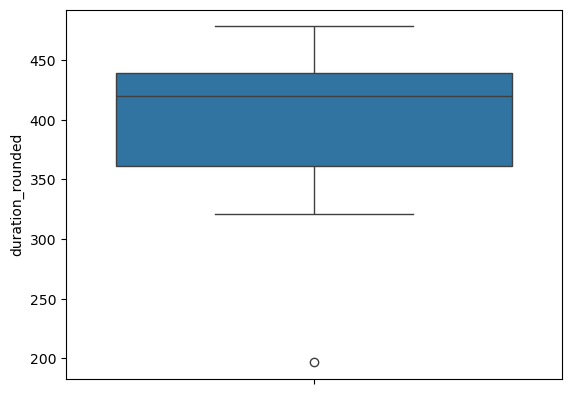

In [172]:
# Making a box plot to visualize monthly calls durations' distribution
sns.boxplot(mean_duration)

<span style="color: black; font-family: Arial; font-size: 20px;">
Surf plan users make significantly more calls than Ultimate plan users

<span style="color: blue; font-family: Arial; font-size: 20px;">
Compare the number of messages that users on each plan typically send each month

In [177]:
monthly_messages = monthly_plans.groupby(['plan', 'month'],as_index = False)['messages'].sum()
monthly_messages.head()

,plan,month,messages
0,surf,1,21.0
1,surf,2,108.0
2,surf,3,351.0
3,surf,4,870.0
4,surf,5,1849.0


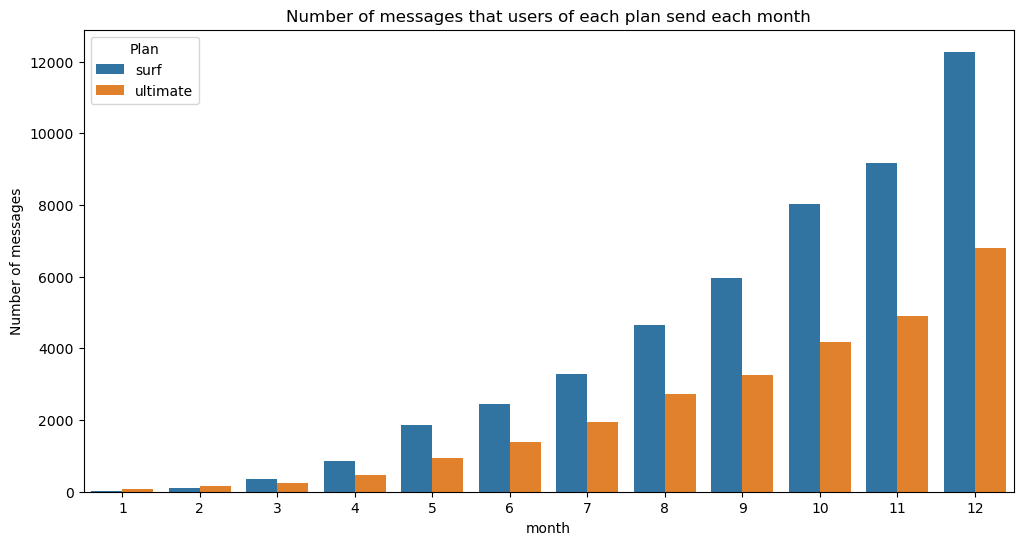

In [257]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='messages', hue='plan', data=monthly_messages)
plt.title('Number of messages that users of each plan send each month')
plt.ylabel('Number of messages')
plt.legend(title = 'Plan')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Surf plan users send more messages each month than Ultimate plan users

<span style="color: blue; font-family: Arial; font-size: 20px;">
Compare the volume of internet traffic consumed by users by plan

In [186]:
monthly_net = monthly_plans.groupby(['plan', 'month'],as_index = False)['gb_used'].sum()
monthly_net.head()

,plan,month,gb_used
0,surf,1,9.521211
1,surf,2,107.040615
2,surf,3,299.751094
3,surf,4,585.166162
4,surf,5,1047.948564


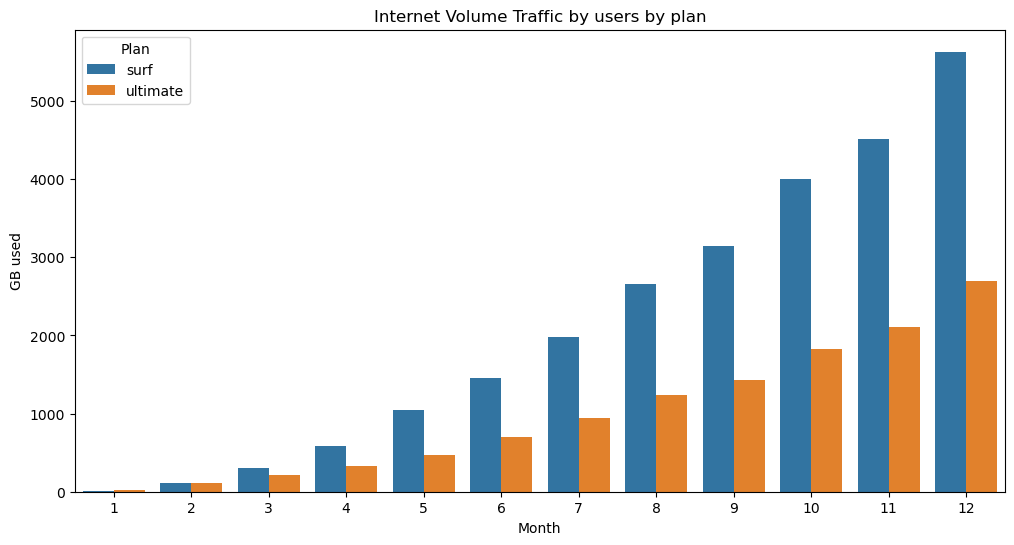

In [261]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='gb_used', hue='plan', data=monthly_net)
plt.title('Internet Volume Traffic by users by plan')
plt.xlabel('Month')
plt.ylabel('GB used')
plt.legend(title = 'Plan')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Surf plan users consume more internet than Ultimate plan users

<span style="color: blue; font-family: Arial; font-size: 20px;">
Study the plans revenues behavior

In [195]:
monthly_revenue = monthly_plans.groupby(['plan', 'month'],as_index = False)['monthly_revenue'].sum()
monthly_revenue.head()

,plan,month,monthly_revenue
0,surf,1,40.000000
1,surf,2,298.295000
2,surf,3,1005.786133
3,surf,4,1951.669258
4,surf,5,3521.941387


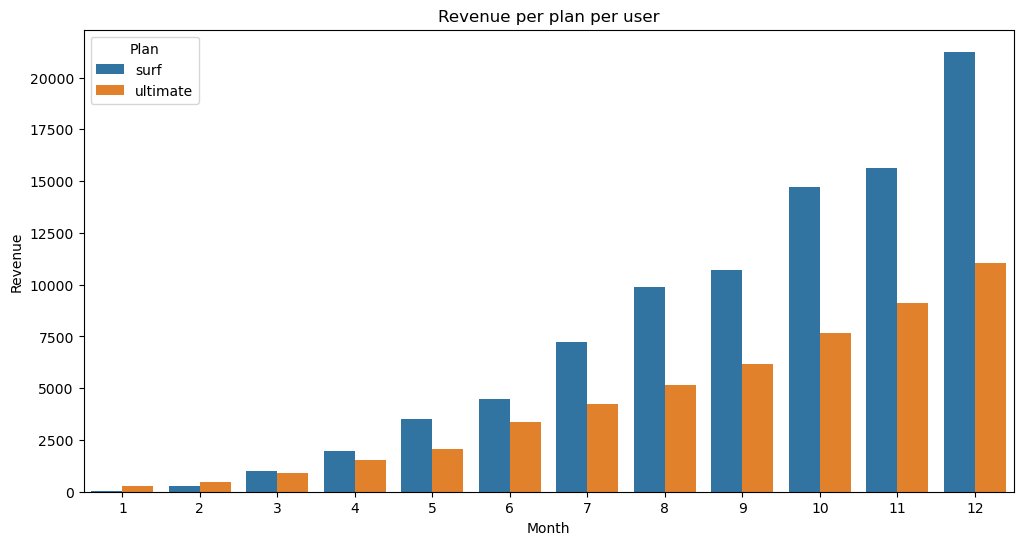

In [265]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='monthly_revenue', hue='plan', data=monthly_revenue)
plt.title('Revenue per plan per user')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title = 'Plan')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
The Surf plan generates more revenue over time than the Ultimate plan

## Hypotheses Tests

<span style="color: blue; font-family: Arial; font-size: 20px;">
Test the hypothesis that the mean users revenue of Ultimate and Surf plans are different.

In [210]:
# H0: The mean revenue for users from Surf and Ultimate plans is the same.
# HA: The mean revenue for users from Surf and Ultimate plans is not the same.

In [271]:
# Testing hypotheses
surf_revenue = monthly_revenue.loc[monthly_revenue['plan'] == 'surf']
ultimate_revenue = monthly_revenue.loc[monthly_revenue['plan'] == 'ultimate']

alpha=0.05

if surf_revenue['monthly_revenue'].var() == ultimate_revenue['monthly_revenue'].var():
    results = st.ttest_ind(surf_revenue['monthly_revenue'], ultimate_revenue['monthly_revenue'],equal_var = True)
else:
    results = st.ttest_ind(surf_revenue['monthly_revenue'], ultimate_revenue['monthly_revenue'],equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We can reject null hypothesis")
else:
    print("We cannot reject null hypothesis")

p-value:  0.1695691992711702
We cannot reject null hypothesis


<span style="color: blue; font-family: Arial; font-size: 20px;">
Test the hypothesis that the mean revenue of users in the NY-NJ area differs from user's revenues in other regions

In [274]:
# H0: The mean revenue of users from NY-NJ region is the same from user's revenues in other regions.
# HA: The mean revenue of users from NY-NJ region is not the same from user's revenues in other regions.

In [276]:
# Testing hypotheses
NYNJ_revenue = monthly_plans.loc[monthly_plans['city'].str.contains('NY-NJ')]
else_revenue = monthly_plans.loc[~monthly_plans['city'].str.contains('NY-NJ')]

alpha=0.05

if NYNJ_revenue['monthly_revenue'].var() == else_revenue['monthly_revenue'].var():
    results = st.ttest_ind(NYNJ_revenue['monthly_revenue'], else_revenue['monthly_revenue'],equal_var = True)
else:
    results = st.ttest_ind(NYNJ_revenue['monthly_revenue'], else_revenue['monthly_revenue'],equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We can reject null hypothesis")
else:
    print("We cannot reject null hypothesis")


p-value:  0.020128295172528086
We can reject null hypothesis


## Conclusions and recommendations

<span style="color: black; font-family: Arial; font-size: 20px;">

The analysis revealed that, although **Surf plan** users make more calls, send more messages, use more internet and appear to generate more revenue over time, **the statistical test showed no significant difference in average revenue** between Surf and Ultimate plans (p-value ≈ 16%).

It indicates that, despite the higher usage rate on the Surf plan, the average revenue per user does not differ statistically from the Ultimate plan.

On the other hand, the geographic analysis revealed a significant result: users in the **NY-NJ region have a different average revenue** compared to users in other regions (p-value ≈ 20%). It suggests an opportunity for regional segmentation.

1. **Region Targeting**: Develop customized campaigns for the NY-NJ area, leveraging the revenue potential identified in the analysis.
2. **Promotions for Ultimate Plan**: Considering that Surf plan usage is more intense but does not generate statistically higher average revenue, it may be interesting to create incentives to increase Ultimate's plan subscription, highlighting cost-benefit benefits for high-consumption users.
3. **Focus on Value-Added Services**: Since Surf plan has a higher data and messaging usage, additional monetization strategies (such as premium internet packages or exclusive benefits) can be explored to increase revenue in this segment.
4. **Future Analysis**: Investigate whether differences in contract duration, churn, or demographic profiles affect the profitability of plans and regions, in order to guide more assertive marketing decisions.

---